In [ ]:
#pip install category_encoders
#pip install category_encoders
#pip install --upgrade xgboost

# Carga Librerias

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


#Carga de DATOS desde kaggle

In [ ]:
api_token={"username":"luisfhidalgo",
           "key":"d4e4e6425d85ef204447086541cb5b11"}

In [ ]:
!rm -rf /roo/.kaggle. # Elimina de forma recursiva y forzada un directorio y su contenido.Por si existe

In [ ]:
!mkdir  /root/.kaggle # Crea Directorio

In [ ]:
#Ese código guarda un token de API (almacenado en la variable api_token) en un archivo JSON llamado kaggle.
#json dentro del directorio .kaggle del usuario (usualmente /root/.kaggle).
# Este archivo se usa para autenticarte en Kaggle desde entornos de programación.
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
#!kaggle datasets list

In [ ]:
#En resumen, hace que el archivo kaggle.json (que contiene tu token de API) sea accesible solo para el usuario root,
# lo cual es una práctica de seguridad recomendada para proteger información sensible como tokens de API.
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#Ese comando usa la herramienta de línea de comandos kaggle para descargar el dataset identificado como hernan4444/animeplanet-recommendation-database-2020.
!kaggle datasets download -d zynicide/wine-reviews

Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
License(s): CC-BY-NC-SA-4.0
 69% 35.0M/50.9M [00:00<00:00, 79.5MB/s]
100% 50.9M/50.9M [00:00<00:00, 92.9MB/s]


## Se listan los archivos que contiene el Zip de Kaggle

In [ ]:
archivo_zip = 'wine-reviews.zip'

# Listar los archivos dentro del ZIP
with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
    archivos = zip_file.namelist()
    print("Archivos en el ZIP:")
    for archivo in archivos:
        print(archivo)

Archivos en el ZIP:
winemag-data-130k-v2.csv
winemag-data-130k-v2.json
winemag-data_first150k.csv


# Se carga el Archivo Dataset al dataframe que voy a utilizar

In [ ]:
#Cargo los Archivos Dataset a los dataframe que voy a utilizar
import zipfile
import pandas as pd

archivo_zip = 'wine-reviews.zip'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:

        with zip_file.open('winemag-data_first150k.csv') as winemag_150_csv:
          winemag_df = pd.read_csv(winemag_150_csv)


df = winemag_df.copy() # para xboots

In [ ]:
winemag_df.shape

(150930, 11)

In [ ]:
winemag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [ ]:
winemag_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


## Transformancion de los datos:

In [ ]:
duplicados = winemag_df.duplicated().sum()
print("Cantidad de duplicados:",duplicados) # son registros exactamente iguales
# Busca registros que contengan la frase
registros_coincidentes = winemag_df[winemag_df['description'].str.contains("This standout Rocks District wine brings earth")]


Cantidad de duplicados: 0


In [ ]:
winemag_df.drop_duplicates(inplace=True)

In [ ]:
# Se elimina columna  'Unnamed: 0',
winemag_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Se completan valores nulos en 'designation' y 'region_1'
winemag_df.loc[:, 'designation'] = winemag_df['designation'].fillna('Unknown')
winemag_df.loc[:, 'region_1'] = winemag_df['region_1'].fillna('Unknown')
winemag_df.loc[:, 'region_2'] = winemag_df['region_2'].fillna('Unknown')

In [ ]:
# Imputación con la mediana en el campo 'price'
mediana_precio = winemag_df['price'].median()
winemag_df['price'] = winemag_df['price'].fillna(mediana_precio)

In [ ]:
# Se elimina  las 5 filas con valores nulos en la columna 'country'
winemag_df.dropna(subset=['country'], inplace=True)




### Relacion Precio puntuacion

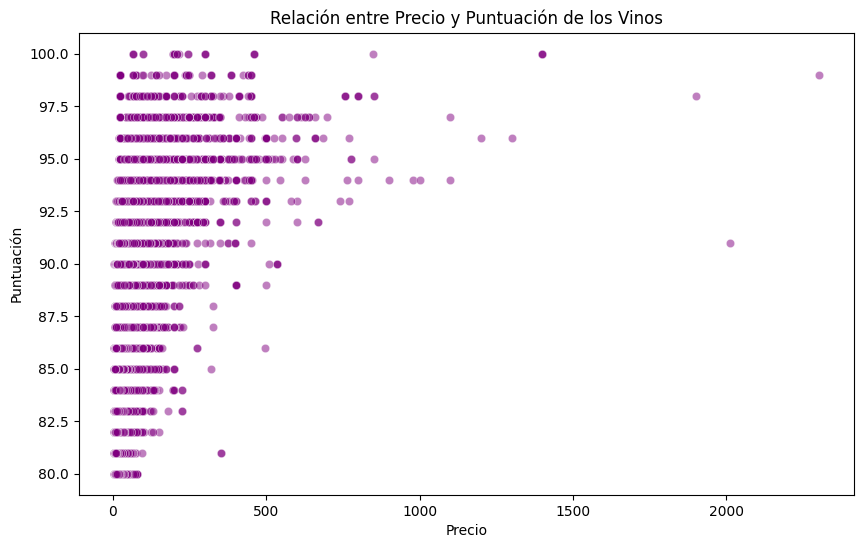

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=winemag_df['price'], y=winemag_df['points'], alpha=0.5, color='purple')
plt.title('Relación entre Precio y Puntuación de los Vinos')
plt.xlabel('Precio')
plt.ylabel('Puntuación')
plt.show()

### Se grafica Top 10 Países por Relación Calidad-Precio

Top 10 variedades por relación calidad-precio:
variety
Malbec-Bonarda                        12.031429
Macabeo-Moscatel                      11.636905
Cabernet Sauvignon and Tinta Roriz    10.750000
Pigato                                10.500000
Carineña                              10.375000
Semillon-Chardonnay                    9.765352
Viura-Chardonnay                       9.682828
Királyleányka                          9.333333
Chardonnay-Pinot Grigio                9.333333
Cserszegi Fűszeres                     9.277778
Name: quality_price_ratio, dtype: float64


<ipython-input-22-22302ebe613f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variety_ratio.head(10).values, y=variety_ratio.head(10).index, palette="viridis")


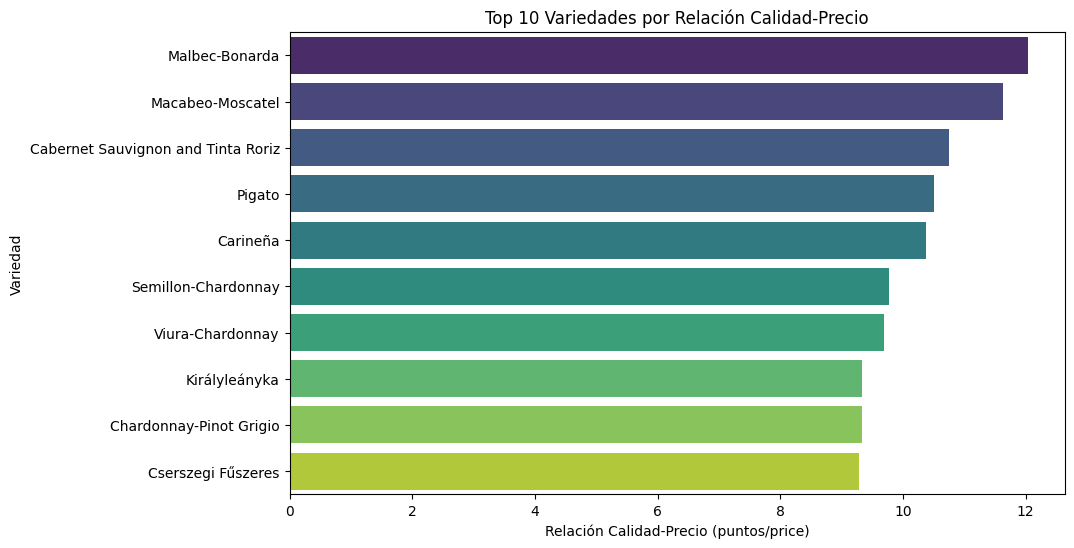

Top 10 países por relación calidad-precio:
country
Lithuania                 8.425000
Bulgaria                  8.369827
Montenegro                8.200000
Romania                   7.709988
India                     6.734135
Bosnia and Herzegovina    6.660256
Moldova                   6.645491
Ukraine                   6.507692
South Korea               6.244318
Chile                     6.043828
Name: quality_price_ratio, dtype: float64


<ipython-input-22-22302ebe613f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_ratio.head(10).values, y=country_ratio.head(10).index, palette="viridis")


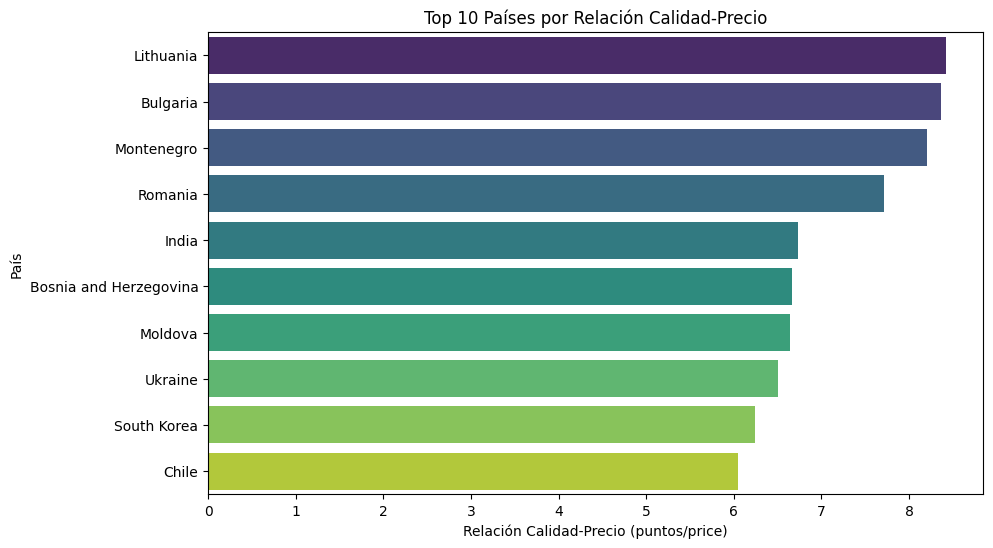

In [ ]:
# Eliminar filas donde 'price' o 'points' sean NaN y evitar divisiones por cero
df = winemag_df.dropna(subset=['price', 'points'])
df = winemag_df[winemag_df['price'] > 0]

# Crear la nueva columna: relación calidad-precio
winemag_df['quality_price_ratio'] = winemag_df['points'] / winemag_df['price']   # Divido puntos sobre precio

# Agrupar por variedad y calcular la media de la relación calidad-precio
variety_ratio = winemag_df.groupby('variety')['quality_price_ratio'].mean().sort_values(ascending=False)
print("Top 10 variedades por relación calidad-precio:")
print(variety_ratio.head(10))

# Visualización para las 10 variedades con mejor relación calidad-precio
plt.figure(figsize=(10,6))
sns.barplot(x=variety_ratio.head(10).values, y=variety_ratio.head(10).index, palette="viridis")
plt.xlabel("Relación Calidad-Precio (puntos/price)")
plt.ylabel("Variedad")
plt.title("Top 10 Variedades por Relación Calidad-Precio")
plt.show()

# Agrupar por país (o región) y calcular la media de la relación calidad-precio
country_ratio = winemag_df.groupby('country')['quality_price_ratio'].mean().sort_values(ascending=False)
print("Top 10 países por relación calidad-precio:")
print(country_ratio.head(10))

# Visualización para los 10 países con mejor relación calidad-precio
plt.figure(figsize=(10,6))
sns.barplot(x=country_ratio.head(10).values, y=country_ratio.head(10).index, palette="viridis")
plt.xlabel("Relación Calidad-Precio (puntos/price)")
plt.ylabel("País")
plt.title("Top 10 Países por Relación Calidad-Precio")
plt.show()

---
## **1. Mejores Variedades y Países por Calidad-Precio**
- Se identificaron las **10 mejores variedades** y **10 mejores países** con mejor relación calidad-precio.


---

# Modelo de prediccion


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Me aseguro que no haya filas con precio nulo o cero (para evitar errores en la regresión) para que la predicccion se base en valores reales

In [ ]:
winemag_df = winemag_df.dropna(subset=['price', 'points'])
winemag_df = winemag_df[winemag_df['price'] > 0]

Seleccion de algunas características para predecir el precio.

In [ ]:
# En este caso usamos 'points' (numérica), 'variety' y 'country' (categóricas)
features = ['points', 'variety', 'country']
X = winemag_df[features]
y = winemag_df['price']

# División del conjunto de datos: 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Definición de los transformadores:

In [ ]:
numeric_features = ['points']
categorical_features = ['variety', 'country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),    # Para las variables numéricas ('points') usamos StandardScaler.
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Para las categóricas ('variety' y 'country') usamos OneHotEncoder.
    ]
)

# pipeline que primero transforma los datos y luego aplica el modelo.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

Se entrena el modelo y se evalua su desempeño

In [ ]:
# Entrenamos
pipeline.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de test
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Error cuadrático medio (MSE) en entrenamiento: {mse_train:.3f}")
print(f"R^2 en entrenamiento: {r2_train:.3f}")

print(f"Error cuadrático medio (MSE) en prueba: {mse_test:.3f}")
print(f"R^2 en prueba: {r2_test:.3f}")


Error cuadrático medio (MSE) en entrenamiento: 652.734
R^2 en entrenamiento: 0.471
Error cuadrático medio (MSE) en prueba: 645.596
R^2 en prueba: 0.412


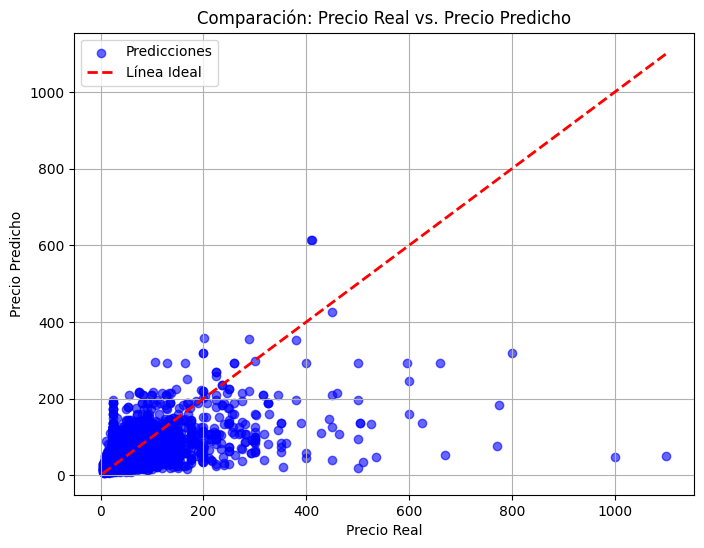

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue', label='Predicciones')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación: Precio Real vs. Precio Predicho")


# Calcular los límites mínimos y máximos para la línea ideal
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Línea Ideal')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Aplicación de Técnicas de Regresión
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleccionar características y variable objetivo
X = df[['points', 'region_1', 'variety']]
y = df['price']

# Convertir variables categóricas a dummy variables
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nError Cuadrático Medio (MSE) del modelo de regresión: {mse}")


Error Cuadrático Medio (MSE) del modelo de regresión: 701.5240044236889


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd



# Seleccionar características y variable objetivo
X = winemag_df[['points', 'region_1', 'variety']]
y = winemag_df['price']

# Convertir variables categóricas a dummy variables
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar el modelo en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Predecir y evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir los resultados
print(f"Error Cuadrático Medio (MSE) en entrenamiento: {mse_train}")
print(f"R^2 en entrenamiento: {r2_train}")
print(f"Error Cuadrático Medio (MSE) en prueba: {mse_test}")
print(f"R^2 en prueba: {r2_test}")

Error Cuadrático Medio (MSE) en entrenamiento: 797.6051214609175
R^2 en entrenamiento: 0.3533768970104111
Error Cuadrático Medio (MSE) en prueba: 701.5240044236889
R^2 en prueba: 0.36143648551053786


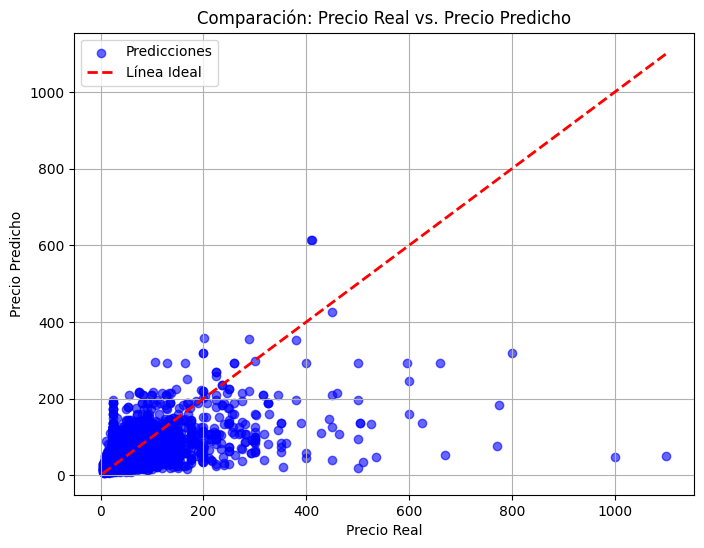

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue', label='Predicciones')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación: Precio Real vs. Precio Predicho")


# Calcular los límites mínimos y máximos para la línea ideal
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Línea Ideal')

plt.legend()
plt.grid(True)
plt.show()

---

## **2. Modelos de Predicción Utilizados**
- **Random Forest Regressor** (Modelo No Lineal).
- **Regresión Lineal** (Modelo Lineal).
- Variables utilizadas: `points` (puntuación), `variety` (tipo de uva) y `country` (país de origen).
- **Nota:** Se aplicó OneHotEncoder para transformar variables categóricas y se dividió el dataset en 80% entrenamiento y 20% prueba.

---

## **3. Comparación de Modelos**
| Modelo            | MSE Entrenamiento | R² Entrenamiento | MSE Prueba | R² Prueba |
|------------------|------------------|-----------------|-----------|----------|
| **Random Forest** | 652.734          | 0.471          | 645.596   | 0.412    |
| **Regresión Lineal** | 797.60        | 0.353          | 701.524   | 0.361    |
- **Nota:** Random Forest tiene mejor desempeño y captura mejor relaciones no lineales.

---

In [ ]:
# Datos de ejemplo para predecir un nuevo vino
nuevo_vino = pd.DataFrame({
    'points': [90],  # Puntuación del vino
    'variety': ['Cabernet Sauvignon'],  # Variedad de uva
    'country': ['Argentina']  # País de origen
})

# Predecir el precio del nuevo vino
precio_predicho = pipeline.predict(nuevo_vino)
print(f'Precio estimado: ${precio_predicho[0]:.2f}')

Precio estimado: $24.22


# Modelos de Predicción
---
## **1. Mejores Variedades y Países por Calidad-Precio**
- Se identificaron las **10 mejores variedades** y **10 mejores países** con mejor relación calidad-precio.
- **Nota:** Algunas variedades y países ofrecen vinos de alta calidad a precios más accesibles.

---

## **2. Modelos de Predicción Utilizados**
- **Random Forest Regressor** (Modelo No Lineal).
- **Regresión Lineal** (Modelo Lineal).
- Variables utilizadas: `points` (puntuación), `variety` (tipo de uva) y `country` (país de origen).
- **Nota:** Se aplicó OneHotEncoder para transformar variables categóricas y se dividió el dataset en 80% entrenamiento y 20% prueba.

---

## **3. Comparación de Modelos**
| Modelo            | MSE Entrenamiento | R² Entrenamiento | MSE Prueba | R² Prueba |
|------------------|------------------|-----------------|-----------|----------|
| **Random Forest** | 652.734          | 0.471          | 645.596   | 0.412    |
| **Regresión Lineal** | 797.60        | 0.353          | 701.524   | 0.361    |
- **Nota:** Random Forest tiene mejor desempeño y captura mejor relaciones no lineales.

---

**Interpretación de los Resultados:**


**MSE (Error Cuadrático Medio):**

Mide el promedio de los errores al cuadrado entre los valores predichos y los reales.

Valores más bajos indican un mejor ajuste del modelo.

Compara el MSE de entrenamiento con el de prueba: un MSE de prueba mucho mayor podría indicar sobreajuste.

**R^2 (Coeficiente de Determinación):**

Mide la proporción de la varianza de la variable objetivo que es predecible a partir de las variables predictoras.

Varía entre 0 y 1. Valores más cercanos a 1 indican un mejor ajuste.

Compara el R^2 de entrenamiento con el de prueba: un R^2 de prueba mucho menor podría indicar sobreajuste.



Rendimiento Superior de Random Forest:

Random Forest supera a la Regresión Lineal tanto en el conjunto de entrenamiento como en el de prueba, como lo demuestran los valores más bajos de MSE y los valores más altos de R^2.
Esto indica que Random Forest captura mejor las relaciones no lineales y complejas presentes en los datos.